# Logistic Regression Project (Predict Ad click)

Logisitc Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability that an instance is greater than 50%, then the model predicts that the instance belongs to that class 1, or else it predicts that it does not. This makes it a binary classifier. In this notebook we will look at the theory behind `Logistic Regression`  and use it to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Importing Modules And Data Loading

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score

data = pd.read_csv("advertising.csv")

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [98]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis (EDA)



In [120]:
missing_values = data.isnull()

# Count missing values per column
missing_counts = data.isnull().sum()

missing_percentages = (data.isnull().sum() / len(data)) * 100
print(missing_percentages)


Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64


<Axes: xlabel='Area Income'>

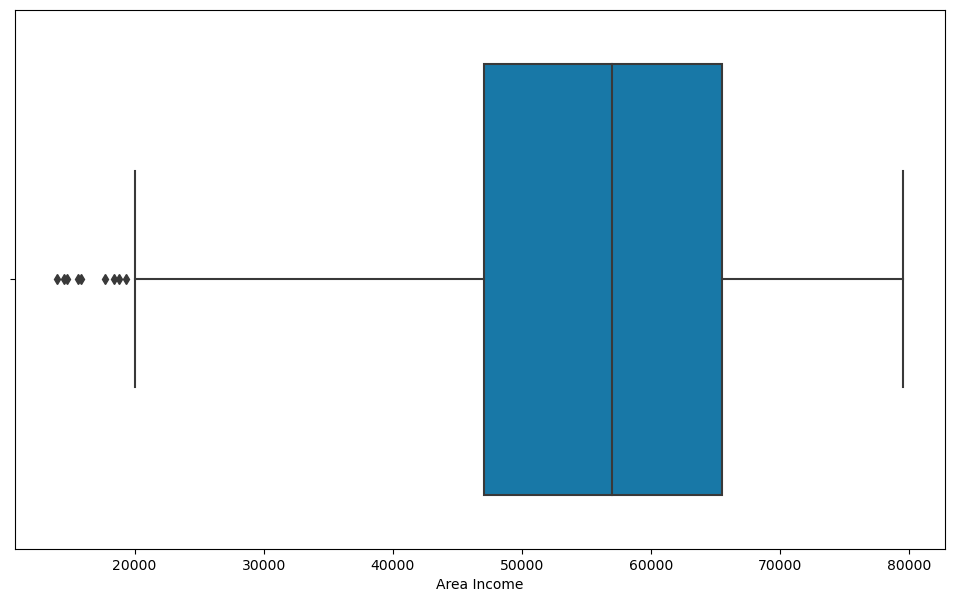

In [99]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Area Income',data=data,palette='winter')

In [100]:
# Function to remove outliers using the Inter-Quartile-Range (IQR) Method
def drop_outliers_using_iqr_method(df,columns_to_drop_in):
    for column in columns_to_drop_in:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        upper_bound = q3 + (1.5*iqr)
        lower_bound = q1 - (1.5*iqr)

        df=df[df[column]<=upper_bound]
        df=df[df[column]>=lower_bound]

    return df

In [101]:
data=drop_outliers_using_iqr_method(data,data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male','Clicked on Ad']])

Text(0.5, 0, 'Age')

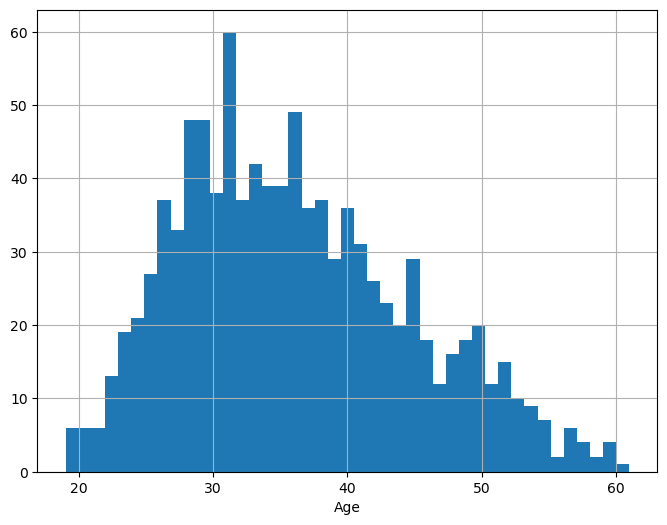

In [102]:
plt.figure(figsize=(8, 6))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

<Figure size 800x600 with 0 Axes>

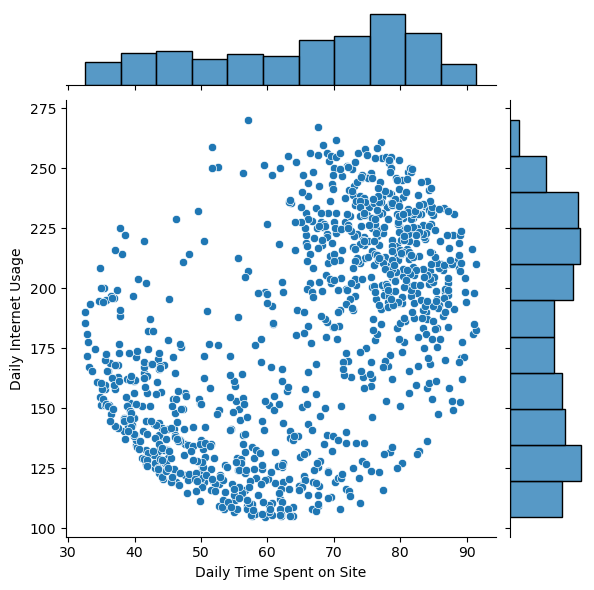

In [103]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=data["Daily Time Spent on Site"], y=data["Daily Internet Usage"])

c:\Users\prana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


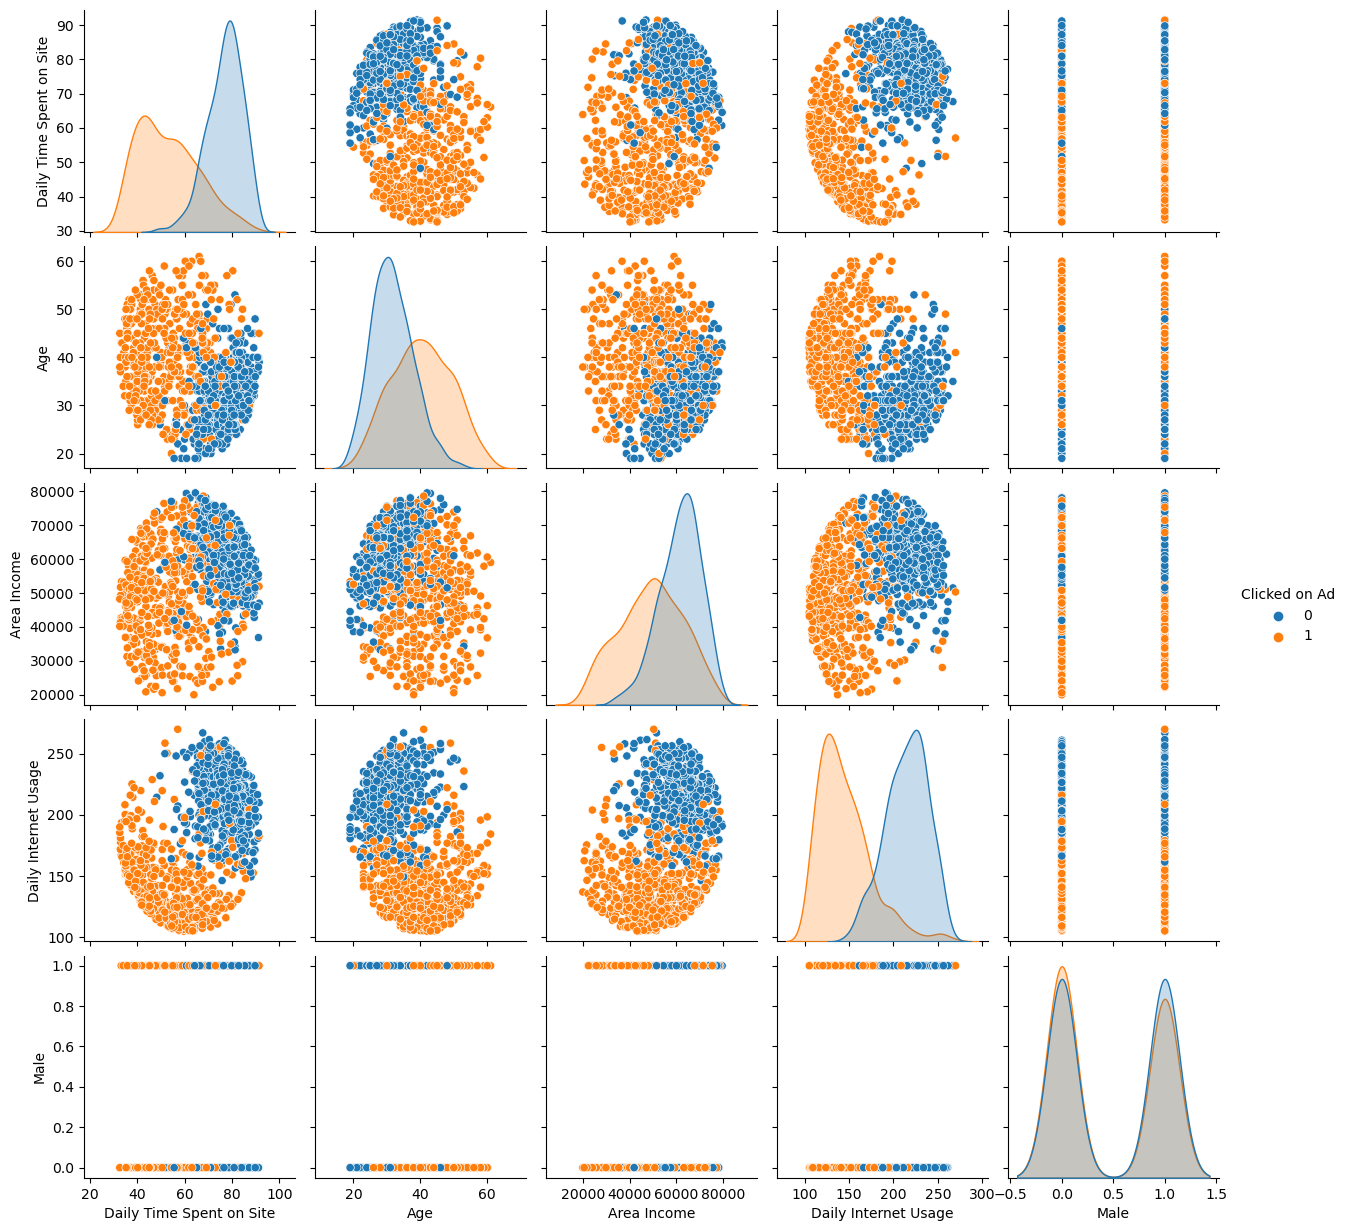

In [104]:
sns.pairplot(data, hue='Clicked on Ad')

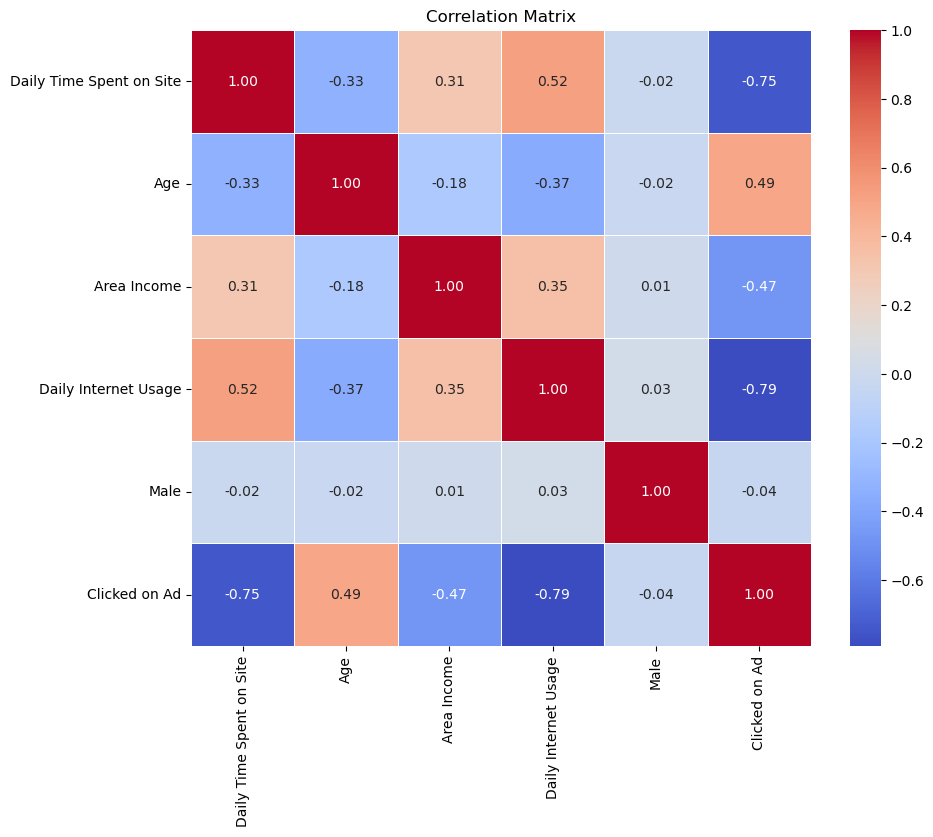

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male','Clicked on Ad']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Data Split (Train - Test)

In [106]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [107]:
import pandas as pd
import random

# Load your DataFrame (assuming it's named 'data')
# data = pd.read_csv('your_data.csv')  # Use your actual data loading code

num_samples = len(data)
num_test_samples = int(0.2 * num_samples)  # 20% of data for testing

# Generate random test indices
test_indices = random.sample(range(num_samples), num_test_samples)

# Ensure test indices are valid and within DataFrame index range
valid_test_indices = [idx for idx in test_indices if idx in data.index]

# Split the dataset into training and testing sets
train_data = data.drop(valid_test_indices)
test_data = data.loc[valid_test_indices]

# Reset the index of the training and testing sets for consistency
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
# Display the shape of the training and testing sets
print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test_data.shape}")


Training set shape: (794, 10)
Testing set shape: (197, 10)


### Logistic Regression Model

In [108]:
# Extract features (X) and target (y) from training data
X_train = train_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y_train = train_data['Clicked on Ad']

# Extract features (X) and target (y) from testing data
X_test = test_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y_test = test_data['Clicked on Ad']



from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [109]:
model.score(X_test,y_test)

0.9390862944162437

### Helper Functions

In [110]:
X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

In [111]:
# Helper Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient

def update_parameters(theta, gradient, learning_rate):
    theta -= learning_rate * gradient
    return theta

def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))

def predict_one_point(x, theta):
    x_with_bias = np.insert(x, 0, 1)  # Add bias term
    predicted_probability = sigmoid(np.dot(x_with_bias, theta))
    predicted_class = 1 if predicted_probability >= 0.5 else 0
    return predicted_class

In [112]:
# Number of features in X_train (including bias term)
num_features = X_train.shape[1]

# Initialize theta with zeros, including bias term
theta = np.zeros(num_features)


# Set Hyperparameters
learning_rate = 0.01
iterations = 1000

In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

# Preprocess features (e.g., scale numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term to the features
X_final = np.column_stack((np.ones(len(X_scaled)), X_scaled))

# Initialize parameters
theta = np.zeros(X_final.shape[1])

# Set hyperparameters
learning_rate = 0.1
iterations = 1000

# Perform gradient descent
for _ in range(iterations):
    # Compute cost
    cost = compute_cost(X_final, y, theta)
    # Compute gradient
    gradient = compute_gradient(X_final, y, theta)
    # Update parameters
    theta = update_parameters(theta, gradient, learning_rate)

In [114]:
import numpy as np

# Define the test points
test_point = [68.95, 35, 61833.9, 256.09, 0]
test_point2 = [47.64, 49, 45632.51, 122.02, 1]

# Scale and add bias term to test_point
test_point_scaled = scaler.transform([test_point])
test_point_final = np.insert(test_point_scaled, 0, 1, axis=1)

# Scale and add bias term to test_point2
test_point2_scaled = scaler.transform([test_point2])
test_point2_final = np.insert(test_point2_scaled, 0, 1, axis=1)


c:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [115]:
# Predict the class for test_point
predicted_class_1 = predict(test_point_final, theta)
print(f"Predicted class for test_point: {int(predicted_class_1[0])}")

# Predict the class for test_point2
predicted_class_2 = predict(test_point2_final, theta)
print(f"Predicted class for test_point2: {int(predicted_class_2[0])}")


Predicted class for test_point: 0
Predicted class for test_point2: 1


In [116]:
# Define the ground truth labels
y_true = [0, 1]  # Example ground truth labels for test_point and test_point2

# Calculate accuracy for test_point
accuracy_1 = (predicted_class_1 == y_true[0]).mean()
print(f"Accuracy for test_point: {accuracy_1}")

# Calculate accuracy for test_point2
accuracy_2 = (predicted_class_2 == y_true[1]).mean()
print(f"Accuracy for test_point2: {accuracy_2}")

Accuracy for test_point: 1.0
Accuracy for test_point2: 1.0


In [117]:
X_test = test_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y_test = test_data['Clicked on Ad']

# Preprocess test features (scale and add bias term)
X_test_scaled = scaler.transform(X_test)
X_test_final = np.column_stack((np.ones(len(X_test_scaled)), X_test_scaled))

# Predict classes for test data
predicted_classes = predict(X_test_final, theta)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy of the logistic regression model on test data: {accuracy:.2f}")

Accuracy of the logistic regression model on test data: 0.97
